# Detect Credit Card Fraud with Machine Learning in Python

In this Project, we will perform detection of credit cards. For carrying out the credit card fraud detection, we will make use of the Card Transactions dataset that contains a mix of fraud as well as non-fraudulent transactions.

## Importing the Datasets
We are importing the datasets that contain transactions made by credit cards.

In [2]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('C:/Users/user/Desktop/ML/Data/creditcard.csv')

## Data Exploration
In this section, we will explore the data that is contained in the creditcard_data dataframe. We will proceed by displaying the creditcard_data using the head() function as well as the info() function.

In [4]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [5]:
#peek at data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
123793,77067.0,-0.755615,0.118921,2.300265,-1.040204,-0.346666,-0.292641,0.585578,-0.191979,1.161763,...,0.017154,0.632973,-0.069913,0.458539,-0.343117,0.942769,-0.138543,-0.297687,29.97,0
133309,80329.0,1.104285,0.116796,0.562199,1.174059,-0.494488,-0.605269,-0.015337,-0.008046,0.199364,...,-0.015439,-0.108406,0.052347,0.363450,0.349401,-0.452127,0.028547,0.029804,34.95,0
181458,124984.0,-1.624453,-0.579190,1.785076,2.396887,1.078498,1.568986,0.625440,-0.480195,-0.785330,...,-0.826031,-1.380098,0.148593,-0.049995,-0.571394,2.206826,-0.974374,-0.296680,129.32,0
57552,47957.0,1.061797,-0.179860,1.118545,1.523269,-0.443389,1.124766,-0.610651,0.424521,0.938334,...,-0.380125,-0.626024,0.026189,-0.287033,0.456811,-0.508413,0.090480,0.016197,9.89,0
174391,121894.0,-1.729157,-2.576845,-1.877180,-4.453247,-0.802856,1.812945,3.605704,-0.095836,-0.575210,...,0.440705,0.438196,1.684079,-1.048883,0.439175,-0.904162,-0.079607,0.201908,842.12,0


In [6]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
#numerical summary 
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


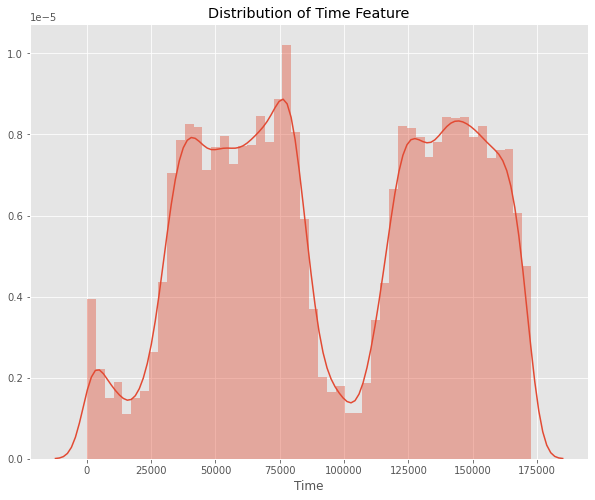

In [8]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

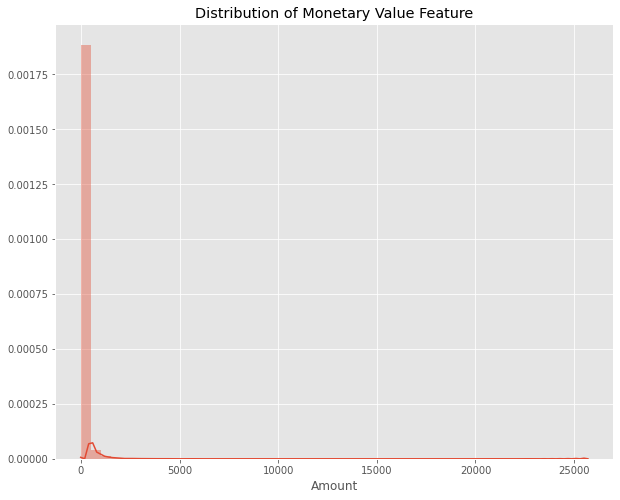

In [9]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

In [10]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

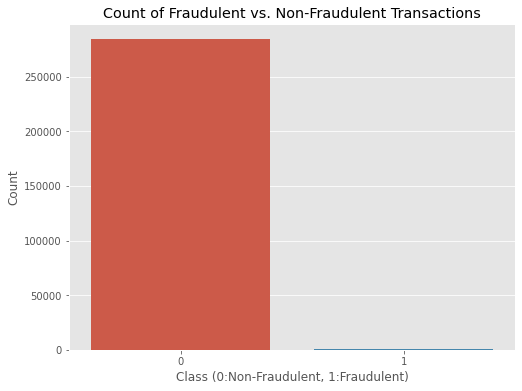

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

As we can see, our data is highly imbalanced. Therefore, we cannot use any supervised learning algorithm directly because it will overfit.

In [12]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,...,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,...,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,...,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,...,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,...,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,...,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,...,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,...,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,...,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


Text(0.5, 1.0, 'Heatmap of Correlation')

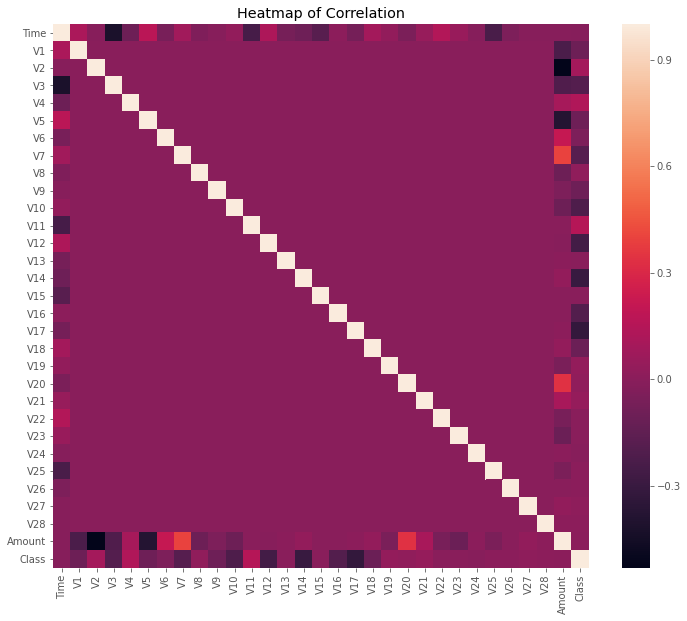

In [13]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

It seems that there is not highly correlated features although there is a slightly negative correlation between ‘V2’ and ‘Amount’features. The ‘Amount’ feature is slightly correlated with the other features as well, meaning that it can partially be calculated by them so we can try dropping it. There is also a little correlation between ‘Time’ and other features.

In [14]:
#skewness
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

## Scaling Amount and Time

In this section, we will scale our data using the **StandardScaler()** function. We will apply this to the amount component of our creditcard_data amount.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [16]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [17]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
27806,34708.0,-1.750,0.617,1.654,-2.748,-1.395,-0.446,-0.790,-1.483,-1.942,...,0.239,0.406,0.255,-0.559,0.469,0.245,17.12,0,-0.285,-1.266
43311,41457.0,1.231,0.237,-0.187,0.748,0.373,0.040,0.164,-0.051,-0.282,...,-0.287,-0.822,0.821,-0.278,0.007,0.004,31.47,0,-0.227,-1.124
60768,49494.0,1.034,-1.334,1.033,-0.410,-1.556,0.483,-1.207,0.358,-0.007,...,-0.066,0.042,0.209,-0.241,0.039,0.030,124.07,0,0.143,-0.954
138726,82813.0,-5.037,-12.027,-2.994,1.729,-5.216,0.729,3.176,-0.925,-1.429,...,-3.063,0.587,-0.644,-0.345,-0.581,0.604,3383.28,0,13.173,-0.253
233113,147445.0,-1.428,-0.029,-0.857,-0.312,0.935,-0.775,0.894,0.069,-0.107,...,1.080,0.657,-0.233,0.092,-0.056,-0.360,91.78,0,0.014,1.108


In [18]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [19]:
df.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
175033,-0.631,0.137,1.405,1.461,-0.564,0.350,0.876,-0.092,0.007,-0.608,...,1.272,-0.238,0.164,0.937,0.634,0.070,0.088,0,0.388,0.576
152856,0.352,1.158,-0.464,0.796,1.092,-0.725,1.133,-0.492,0.373,-0.304,...,0.704,-0.268,0.686,-0.274,0.541,0.140,0.180,0,-0.329,0.056
221780,1.959,-0.609,-0.338,0.319,-0.742,-0.043,-0.867,0.209,1.228,0.208,...,0.660,0.135,-0.373,-0.328,0.579,-0.029,-0.064,0,-0.316,1.008
79653,-1.437,1.093,0.788,0.801,-0.328,1.551,0.827,0.344,-0.541,0.289,...,0.977,0.124,-0.562,-0.479,0.669,-0.275,-0.132,0,0.286,-0.773
109309,1.180,0.223,0.087,0.953,0.087,-0.368,0.258,-0.225,-0.093,-0.067,...,-0.205,-0.191,-0.435,0.677,-0.397,0.019,0.030,0,-0.103,-0.495


## Splitting Data into Train and Test

In [20]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask] # inverse 
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256612, 31)
Test Shape: (28195, 31)


One of the common situation when should we use **.reset_index**, which is given in this example, is when the dataframe has non-consecutive indices, meaning the indices are not sequential like 0, 1, 2,… and skip some values. This can occur when we create a new dataframe by selecting the rows from another dataframe, causing some of the indices to be out of order. By using reset_index() it will set the indices in order, starting from 0, and make it easier for us to work with the dataframe.

In [22]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

### Creating a subsample data set with balanced class distributions

In [23]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 436 fraudulent transactions in the train data.


In [24]:
#randomly selecting 436 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [25]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
144573,0.007,-0.276,0.913,-1.262,-0.174,-0.040,-0.322,0.036,-0.837,0.288,...,1.240,-0.057,0.525,-0.620,-0.019,0.211,0.211,0,-0.233,0.390
94145,-0.237,0.987,0.994,0.424,-0.284,-0.864,0.460,-0.136,-0.006,0.263,...,0.162,0.052,0.388,-0.709,0.252,0.062,0.159,0,-0.322,-0.542
93517,-0.248,-2.140,1.246,3.313,-1.842,0.887,-0.195,0.285,0.467,0.160,...,0.406,-0.559,0.425,-0.060,0.108,-0.050,0.154,0,2.303,-0.548
100090,-0.762,0.554,1.929,-0.331,0.141,-0.553,0.814,-0.052,-0.007,-0.287,...,-0.211,-0.121,0.544,-0.014,0.070,0.115,-0.062,0,-0.259,-0.479
31074,-2.393,-0.850,0.857,0.185,1.473,-0.630,0.287,0.040,0.098,0.195,...,-0.451,1.452,-0.795,0.310,0.240,0.715,-0.125,0,-0.321,-1.203


In [26]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [27]:
subsample = pd.concat([selected, fraud])
len(subsample)

872

To shuffle your dataframe in-place and reset the index:

*df = df.sample(frac=1).reset_index(drop=True)*

Here, specifying *drop=True* prevents .reset_index from creating a column containing the old index entries.

to use the *.sample* method of your dataframe to sample all rows without replacement:

*df.sample(frac=1)* the frac keyword argument specifies the fraction of rows to return in the random sample, so frac=1 means return all rows (in random order).

In [28]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-0.762,0.554,1.929,-0.331,0.141,-0.553,0.814,-0.052,-0.007,-0.287,...,-0.211,-0.121,0.544,-0.014,0.070,0.115,-6.156e-02,0,-0.259,-0.479
1,1.191,0.129,0.315,0.946,-0.315,-0.421,-0.093,0.066,0.055,0.208,...,-0.209,-0.063,-0.058,0.498,-0.431,0.006,1.055e-02,0,-0.293,-1.943
2,-4.124,3.749,-7.927,7.763,-0.769,-2.031,-3.475,0.107,-1.551,-2.411,...,0.688,0.430,-0.621,-0.370,0.367,-2.665,4.171e-01,1,-0.349,1.206
3,-29.876,16.435,-30.559,6.506,-21.666,-4.940,-20.081,19.588,-3.591,-7.801,...,-2.232,-1.413,0.179,2.156,-0.209,1.256,3.645e-01,1,0.047,-1.392
4,1.282,0.088,-0.217,0.330,0.047,-0.132,-0.187,0.146,0.196,-0.048,...,-1.122,-0.006,-0.940,0.263,0.156,-0.044,4.995e-03,0,-0.321,-0.436
5,1.190,0.942,0.082,3.024,0.412,-0.214,0.054,-0.110,0.884,-0.554,...,-1.047,-0.057,-0.341,0.541,-0.098,-0.003,4.982e-02,1,-0.338,-1.634
6,-0.547,-0.321,-0.493,-2.395,0.373,-0.680,0.826,-0.284,-0.825,0.278,...,1.345,-0.293,-1.019,-0.232,-0.069,0.361,2.253e-01,0,0.217,0.788
7,-9.849,7.366,-12.899,4.273,-7.612,-3.427,-8.351,6.864,-2.388,-6.066,...,-0.874,-0.193,-0.035,0.539,-0.264,1.134,2.260e-01,1,0.047,-0.920
8,-0.334,0.651,1.199,-0.015,-0.724,-0.121,-0.511,0.668,0.342,-0.596,...,0.198,-0.022,-0.490,-0.537,0.303,-0.076,-2.409e-02,0,-0.325,-1.110
9,1.240,0.286,0.534,0.635,-0.205,-0.437,-0.150,-0.109,1.118,-0.263,...,-0.893,0.096,-0.068,0.202,0.059,-0.061,-9.345e-04,0,-0.339,-1.488


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

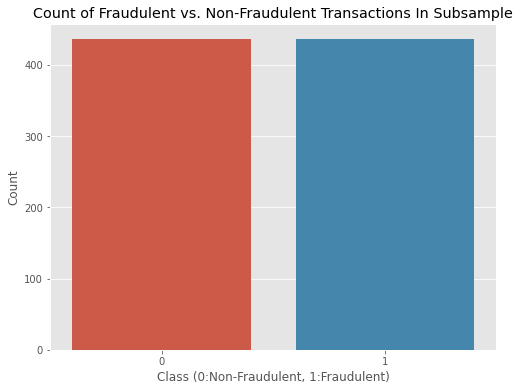

In [29]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [30]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.439
V2,0.491
V3,-0.576
V4,0.704
V5,-0.389
V6,-0.406
V7,-0.486
V8,0.050
V9,-0.552
V10,-0.633


In [31]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.576
V9,-0.552
V10,-0.633
V12,-0.684
V14,-0.751
V16,-0.601
V17,-0.563


In [32]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.704
V11,0.688
Class,1.000


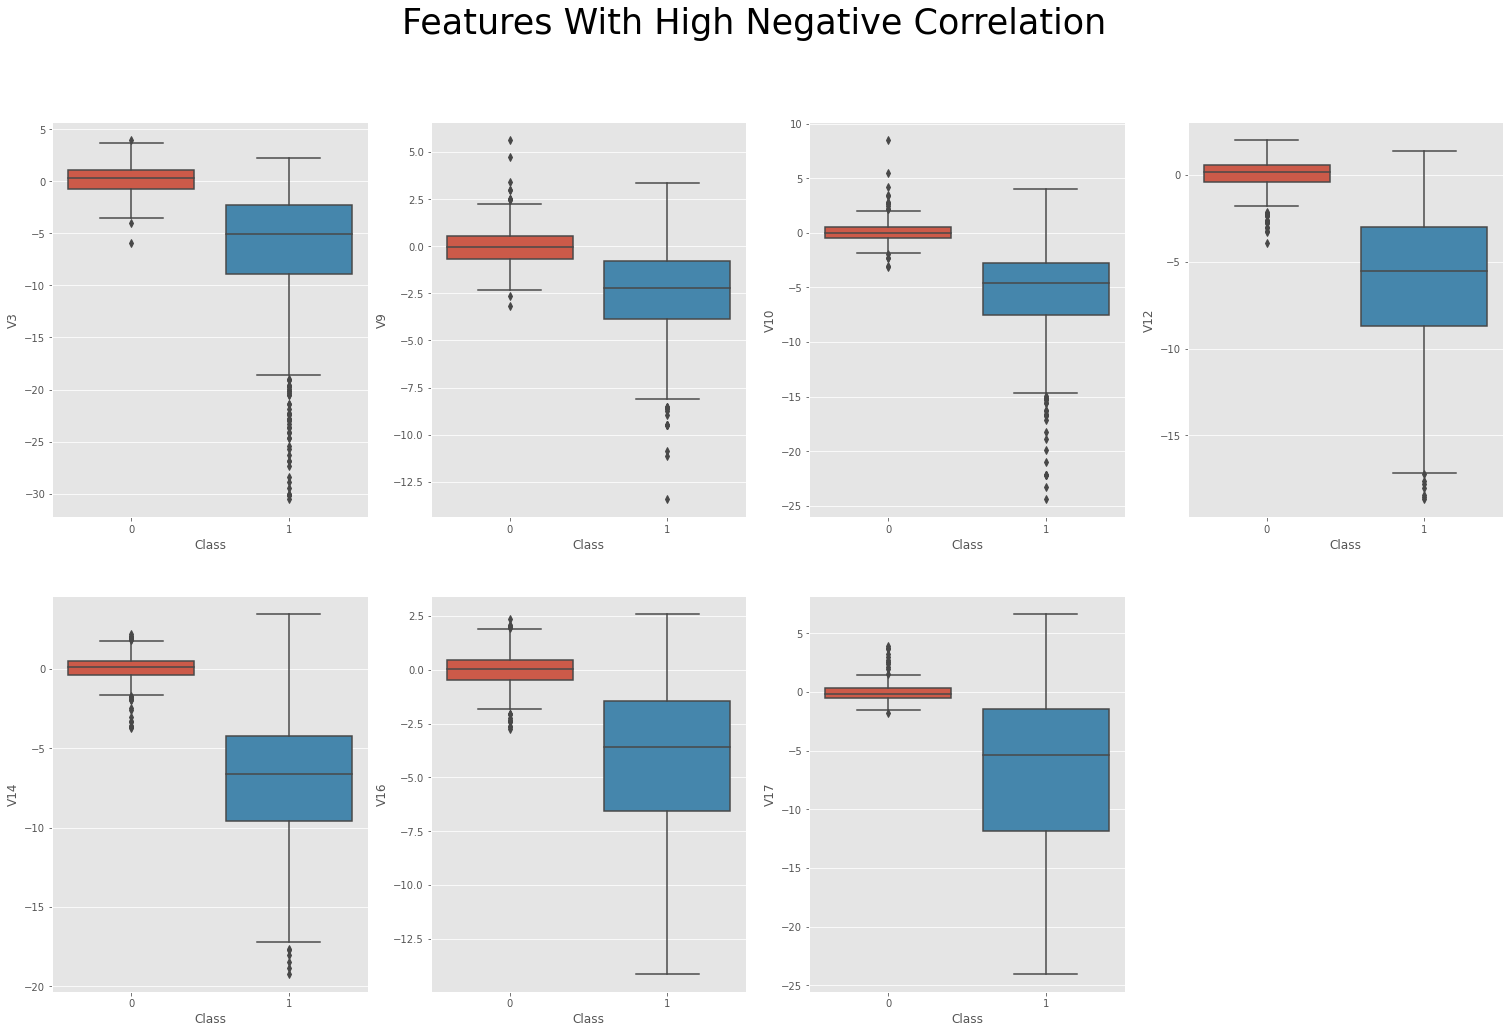

In [33]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

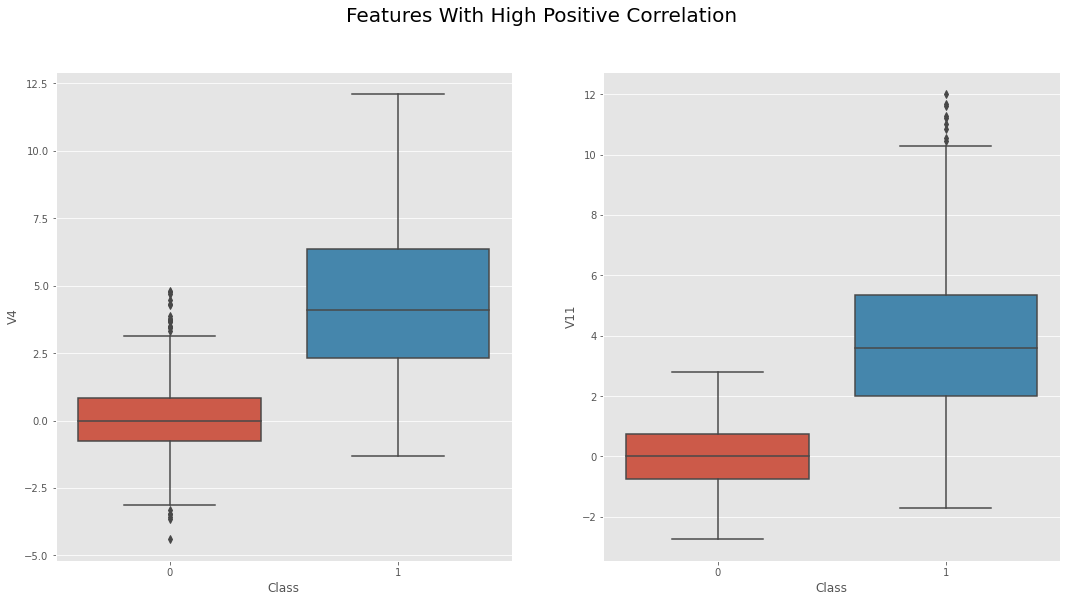

In [34]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

### Extreme Outlier Removal

In [35]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [39]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 872 transactions by 258 transactions to 614 transactions.


### Dimensionality Reduction

In [40]:
from sklearn.manifold import TSNE #t-distributed Stochastic Neighbor Embedding.

X = df2.drop('Class', axis=1)
y = df2['Class']

In [41]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

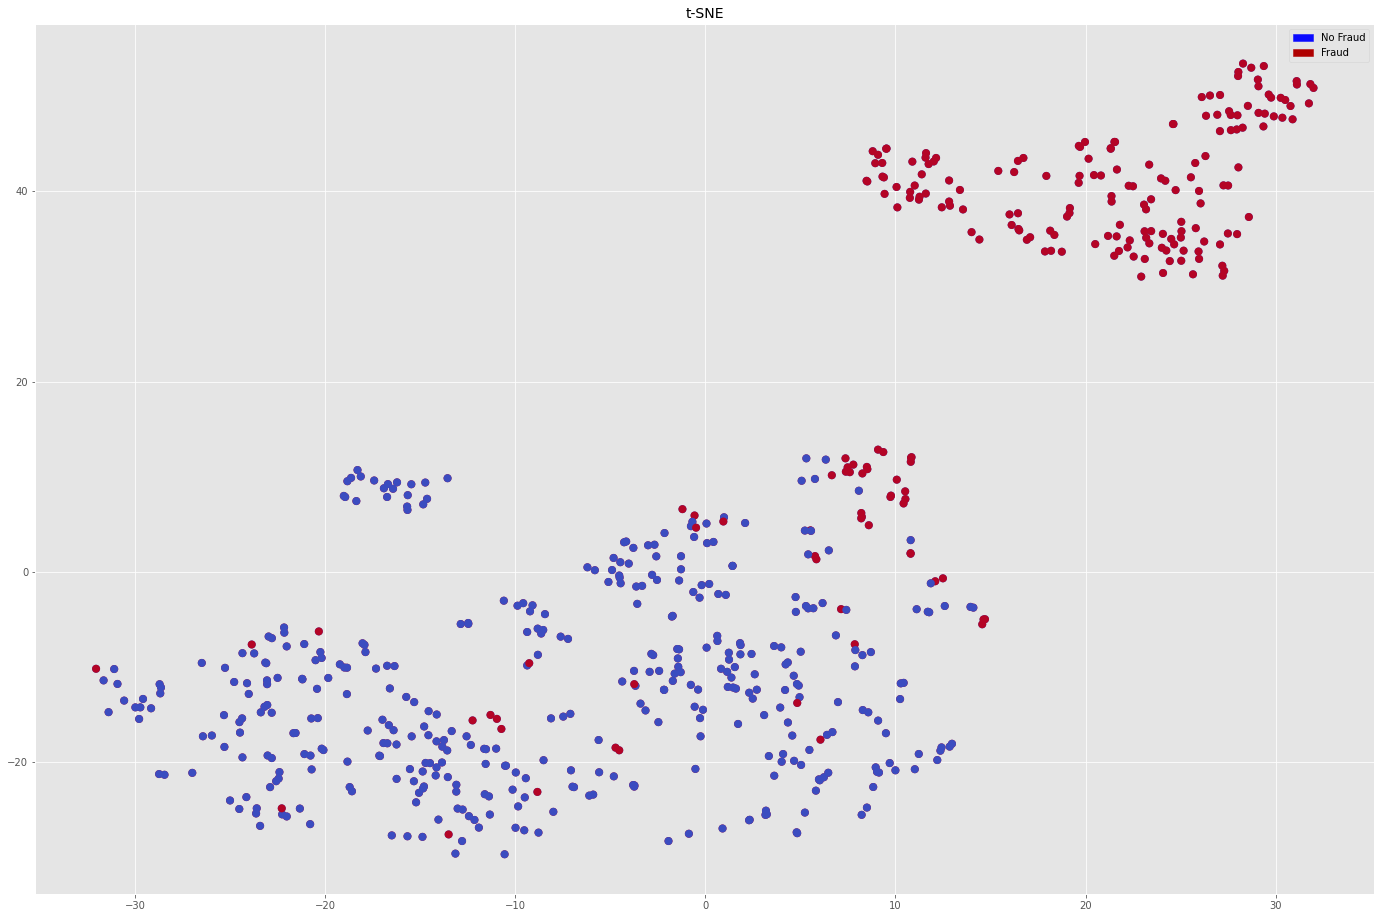

In [42]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

### Classification Algorithms

In [43]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [44]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [46]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (491, 30) (123, 30) 

Y_shapes:
 Y_train: Y_validation:
 (491,) (123,)


In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [50]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.969492 (0.029071)
LDA: 0.960715 (0.037054)
KNN: 0.961363 (0.036264)
CART: 0.866810 (0.066906)
SVM: 0.962962 (0.036124)
XGB: 0.972916 (0.025966)
RF: 0.958877 (0.036021)


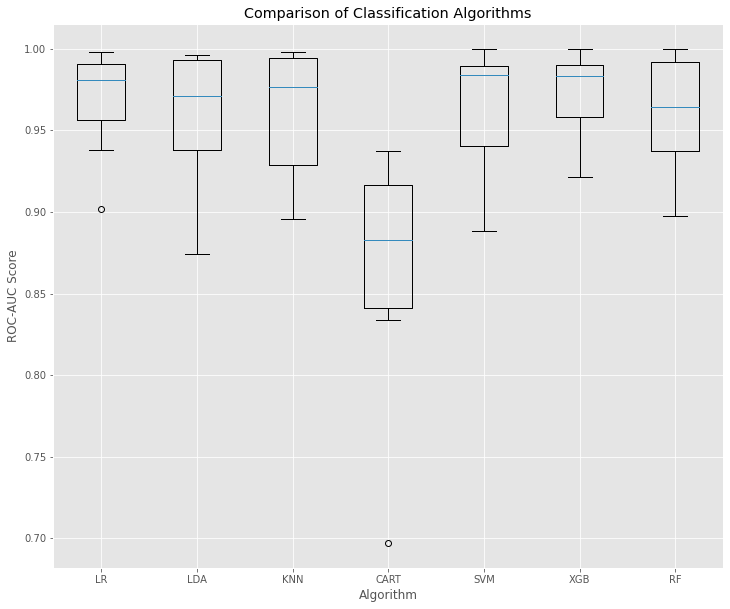

In [51]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')